<a href="https://colab.research.google.com/github/cdavis94-school/s23-CS167-Notes/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Problem being solved: predicting if a player will hit over 30 homeruns based off of other batting statistics 

Data prep: on another file I used the pybaseball library to create a batting statistic csv file with all MLB batter statistics from 2002-2022. I then created a new collumn that said whether or not a batter hit over 30 homeruns in a season. Additionally all data used was normalized to create balance between counting stats (whole numbers) and average s

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
#holy imports batman
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [48]:
import pandas
#data was acquired in another personal project using the pybaseball library. https://www.youtube.com/watch?v=ZO3HAVm9IdQ&ab_channel=Dataquest
#data wasn't predicting total HR's with much accuracy so i changed the dataset and goal to see if it could predict if a player hits over 30 in a season
path = '/content/drive/MyDrive/datasets/batting.csv'
data = pandas.read_csv(path)

In [50]:
data = data[['Age','G','AB','PA','H','1B','R','RBI','SO','AVG','HR_30','SLG','OBP']]
predictors = data.columns.drop('HR_30')
target = "HR_30"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)


In [51]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

# 3. Research

Put your code and your experiments here.

In [52]:
#PCA
extractor = PCA(n_components=2, whiten=True)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

# transform your train_data and _test_data
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

#build and test your model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.926914968376669


In [55]:
#perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
HR_predictions = perc.predict(test_data)

#output accuracy
print("Homerun accuracy:", metrics.accuracy_score(test_sln, HR_predictions))

Homerun accuracy: 0.9388615600843289


Accuracy:  0.9880534082923401


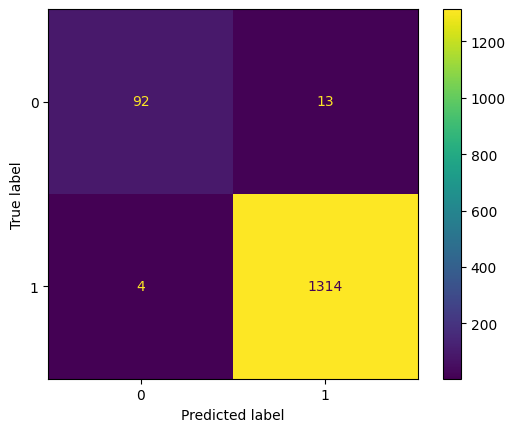

In [57]:
#MLP
mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

# Confusion Matrix
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

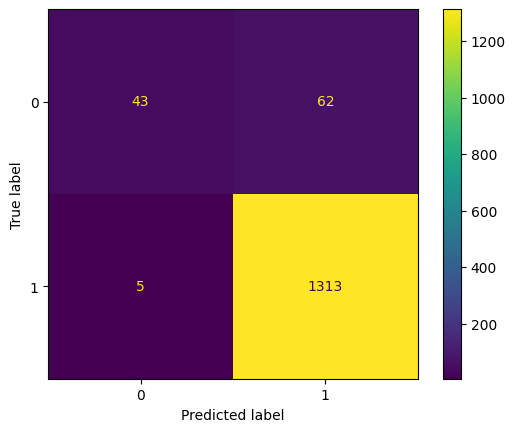

In [60]:
#SVM
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

In [66]:
#Neural Networks
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=12))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [67]:
x = data.drop('HR_30', axis=1)
y = data['HR_30']

hist = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
57/57 [==============================] - 7s 7ms/step - loss: 20.6718 - mae: 20.6718 - val_loss: 3.6786 - val_mae: 3.6786
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 7.1657 - mae: 7.1657 - val_loss: 4.5433 - val_mae: 4.5433
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 4.6091 - mae: 4.6091 - val_loss: 1.4662 - val_mae: 1.4662
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 6.4559 - mae: 6.4559 - val_loss: 4.3331 - val_mae: 4.3331
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 2.6850 - mae: 2.6850 - val_loss: 3.3591 - val_mae: 3.3591
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 2.3474 - mae: 2.3474 - val_loss: 0.5714 - val_mae: 0.5714
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 1.2901 - mae: 1.2901 - val_loss: 1.6562 - val_mae: 1.6562
Epoch 8/50
57/57 [==============================] - 0s 5ms/step - loss: 1.7762 - mae: 1.

[]

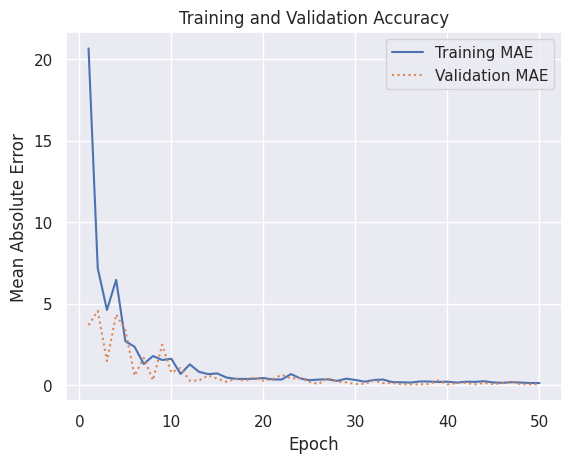

In [69]:
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [ ]:
#convolutional neural networks

In [ ]:
#recurrent neural networks

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*